<a href="https://colab.research.google.com/github/vel688/KNN-AND-NAIVE-BAYES-CLASSIFICATION/blob/main/KNN_TITANIC_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Defining the Question


##a)Specifying the Data Analytic Question

Build  a model using K-N Naighbours to predict the survivors of the titanic shipwreck.

Adjust splitting size for training test and number of neigbours in order to optimize the model

##b)Metric for Success
 If the model has an accuracy higher than 80% it will be considered successful 

##c)Understanding the context

The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.

Building a model that can predict survivers is crucial in order to prevent future tragedies.


##d)Recording the Experimental Design

-importing libraries

-loading data

-data cleaning

-exploratory data analysis

-modeling

-implementing model

-conclusion

-recommendations


#Data Preparation

In [115]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [116]:
#Upload the dataset
df = pd.read_csv("/content/train (5) (1).csv")
df.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Description

pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)

survival        Survival
                (0 = No; 1 = Yes)

name            Name

sex             Sex

age             Age

sibsp           Number of Siblings/Spouses Aboard

parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)


##checking the data

In [117]:
# creating a list of dataframe columns 
clmn = list(df) 
  
for i in clmn: 
    # printing a third element of column 
    print(df[i].unique()) 

  #This are the features i will work with

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [118]:
#check the data types for all the variables 
df.dtypes

#Survived,Pclass SibSp,Parch have the dataset integer
#Sex and Embarked are strings
#Age is a float     

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [119]:
#Label encode every column that is categorical
df['Sex'].replace(['male', 'female'],[1,0],inplace=True)
df['Embarked'].replace(['S', 'C','Q'],[0,1,2],inplace=True)

#Its neccesary for modelling

In [120]:
#Check if the label encoding was successful
df.sample(2)

 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",0,40.0,1,1,16966,134.50,E34,1.0
301,302,1,3,"McCoy, Mr. Bernard",1,NaN,2,0,367226,23.25,NaN,2.0


In [121]:
df.shape
#There are 891 rows and 12 

(891, 12)

##Data Cleaning

##1)Validity

In [122]:
#Get columns that only numerical to use for boxplots
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0


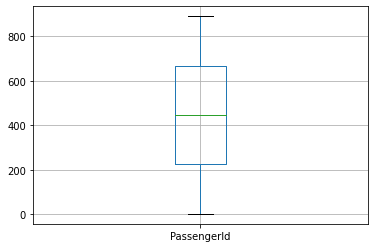

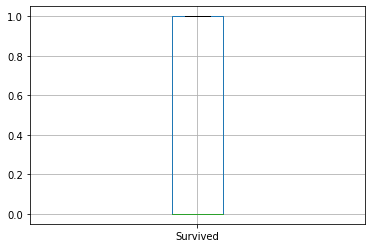

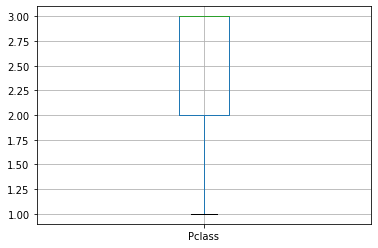

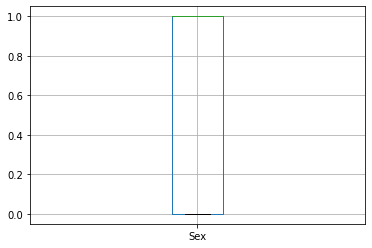

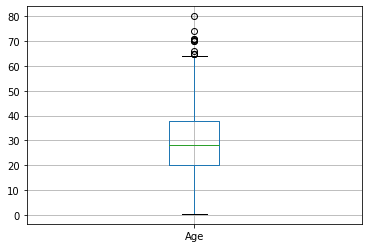

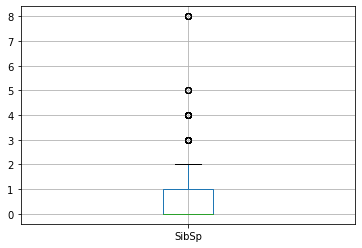

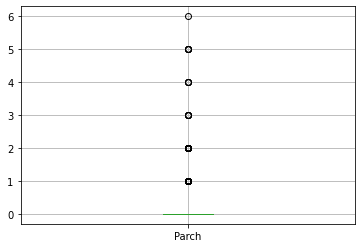

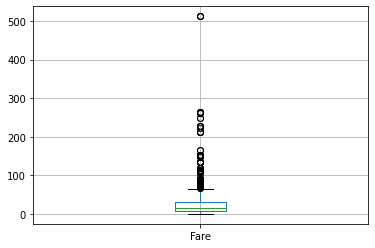

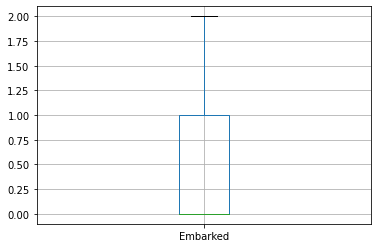

In [123]:
#Check for OUTLIERS 
for column in df_num:
    plt.figure()
    df_num.boxplot([column])

In [124]:
#Checking some outliers
df[df['Fare'] >= 500]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,NaN,1.0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,PC 17755,512.3292,B51 B53 B55,1.0
737,738,1,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,PC 17755,512.3292,B101,1.0


upon close investigation, It has been noted that the outliers are because of the people who were charged above 500/= were for the first class. Therefore the dataset is valid to work with as it is

##2)Completeness

In [125]:
#Check for pesence of m issing values
df.isnull().sum()

#The column age has 177 missing values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
#Filling the null values 
#Since our aim is to create a KNN model we need to fill null values
df = df.fillna(df.mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##3)Consistency

In [127]:
#check for duplicates from the dataset
df.duplicated().sum()

0

#Exploratory Data Analysis

##Univariate Analysis

I am performing this analysis to get insights on the dataset



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


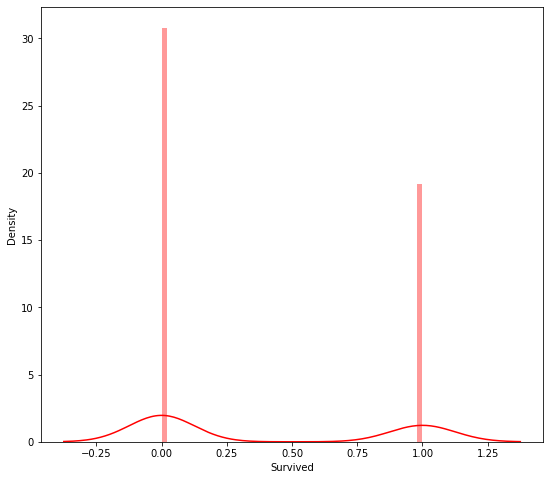

In [128]:
plt.figure(figsize=(9, 8))
sns.distplot(df['Survived'], color='r', bins=50, hist_kws={'alpha': 0.4});

Majority of the people that had boarded did not survive 
549 people died while 342 people survived 

In [129]:
df.groupby(df['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

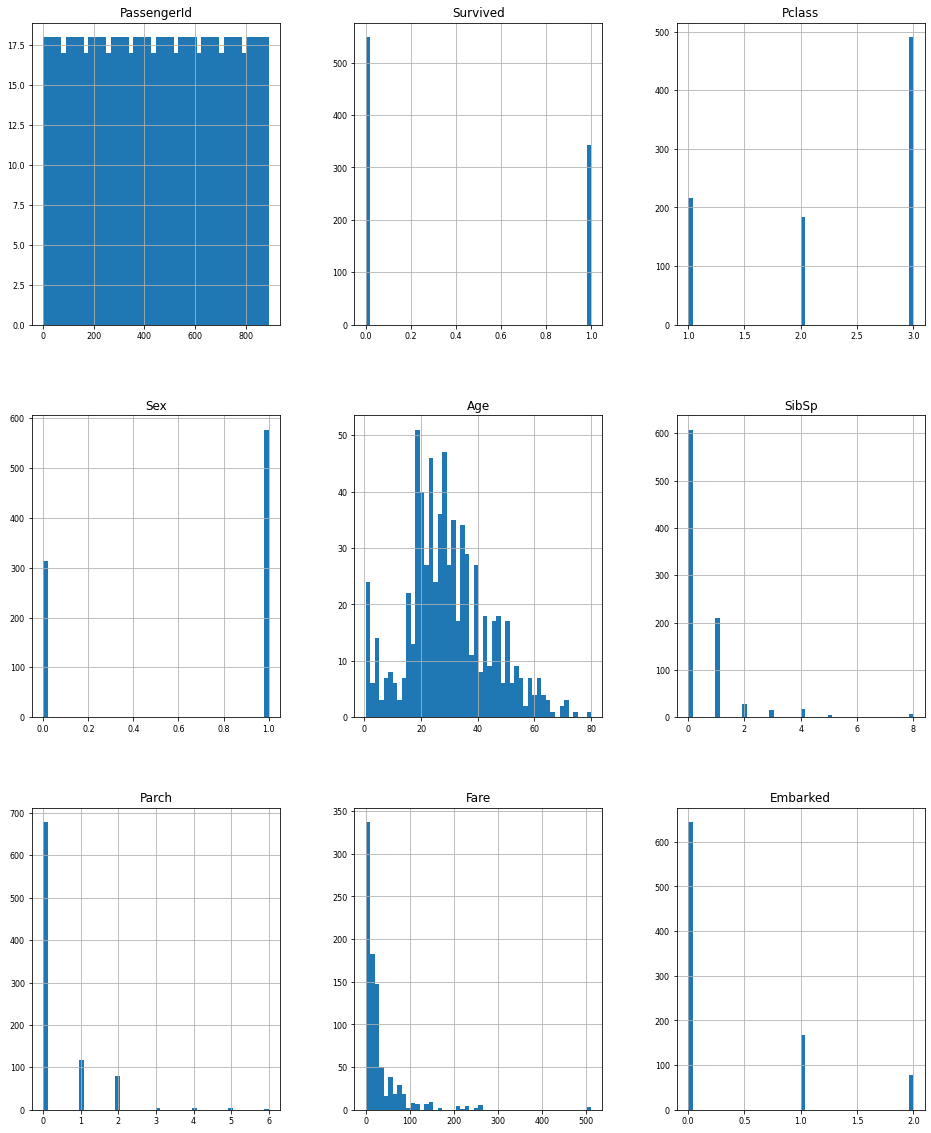

In [130]:
#We can now plot the histograms
#print(df_num["Age"].max())
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Majority of the people were aged between 18 - 40
Also many people that had boarded died during the incident 
Most of the people were in the 3rd class

##Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'People that did not Survive')

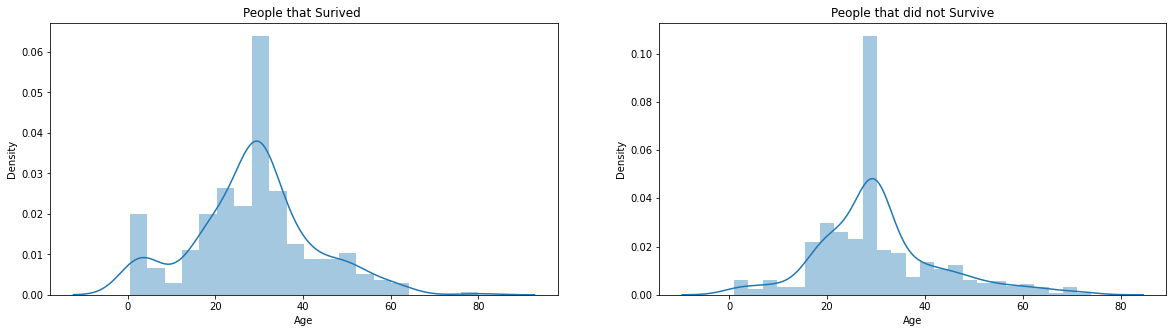

In [131]:
#Checking the missing the people that survived based on their age 
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(df[df['Survived']==1].Age,ax=ax[0])
ax[0].set_title('People that Surived ')
sns.distplot(df[df['Survived']==0].Age,ax=ax[1])
ax[1].set_title('People that did not Survive')

#Most of the children survived compared to the elder people
#Majority of the people that died 20 and 40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'People that did not Survive based on Passenger_class')

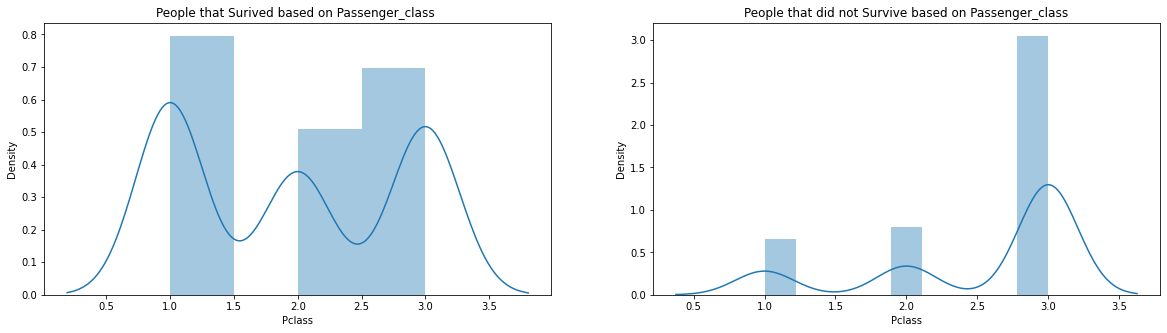

In [132]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(df[df['Survived']==1].Pclass,ax=ax[0])
ax[0].set_title('People that Surived based on Passenger_class ')
sns.distplot(df[df['Survived']==0].Pclass,ax=ax[1])
ax[1].set_title('People that did not Survive based on Passenger_class')

In [133]:
df.groupby(['Survived','Pclass'])['Pclass'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

Most of the people that were onboard were in the 3rd class. 372 people in 3rd class lost their lives
More than half in first class survived
For the second class,half of the people survived 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'People that did not Survive based on gender')

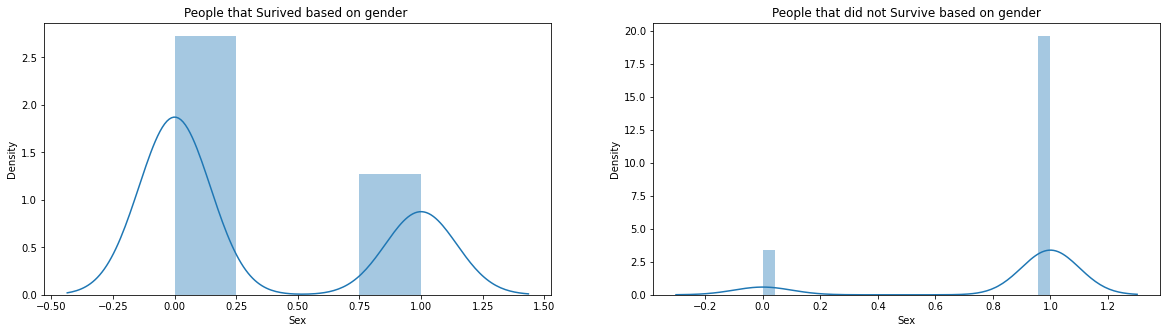

In [134]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(df[df['Survived']==1].Sex,ax=ax[0])
ax[0].set_title('People that Surived based on gender ')
sns.distplot(df[df['Survived']==0].Sex,ax=ax[1])
ax[1].set_title('People that did not Survive based on gender')

In [135]:
#Between males and females who survived 
df.groupby(["Survived","Sex"])["Sex"].count()

#More males lost their lives

Survived  Sex
0         0       81
          1      468
1         0      233
          1      109
Name: Sex, dtype: int64

In [136]:
#Checking the total number of males and females boarded
df.groupby(['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
0,314,314,314,314,314,314,314,314,314,97,314
1,577,577,577,577,577,577,577,577,577,107,577


In [137]:
#Check the rows that have siblings and spouses == 8 
df[df['SibSp'] == 8]

#The bigger the family,the likelihood of them dying increases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",1,29.699118,8,2,CA. 2343,69.55,NaN,0.0
180,181,0,3,"Sage, Miss. Constance Gladys",0,29.699118,8,2,CA. 2343,69.55,NaN,0.0
201,202,0,3,"Sage, Mr. Frederick",1,29.699118,8,2,CA. 2343,69.55,NaN,0.0
324,325,0,3,"Sage, Mr. George John Jr",1,29.699118,8,2,CA. 2343,69.55,NaN,0.0
792,793,0,3,"Sage, Miss. Stella Anna",0,29.699118,8,2,CA. 2343,69.55,NaN,0.0
846,847,0,3,"Sage, Mr. Douglas Bullen",1,29.699118,8,2,CA. 2343,69.55,NaN,0.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,29.699118,8,2,CA. 2343,69.55,NaN,0.0


             PassengerId  Survived    Pclass  ...     Parch      Fare  Embarked
PassengerId     1.000000 -0.005007 -0.035144  ... -0.001652  0.012658 -0.030479
Survived       -0.005007  1.000000 -0.338481  ...  0.081629  0.257307  0.108472
Pclass         -0.035144 -0.338481  1.000000  ...  0.018443 -0.549500  0.043714
Sex             0.042939 -0.543351  0.131900  ... -0.245489 -0.182333 -0.118347
Age             0.033207 -0.069809 -0.331339  ... -0.179191  0.091566  0.009464
SibSp          -0.057527 -0.035322  0.083081  ...  0.414838  0.159651 -0.060591
Parch          -0.001652  0.081629  0.018443  ...  1.000000  0.216225 -0.079300
Fare            0.012658  0.257307 -0.549500  ...  0.216225  1.000000  0.063396
Embarked       -0.030479  0.108472  0.043714  ... -0.079300  0.063396  1.000000

[9 rows x 9 columns]


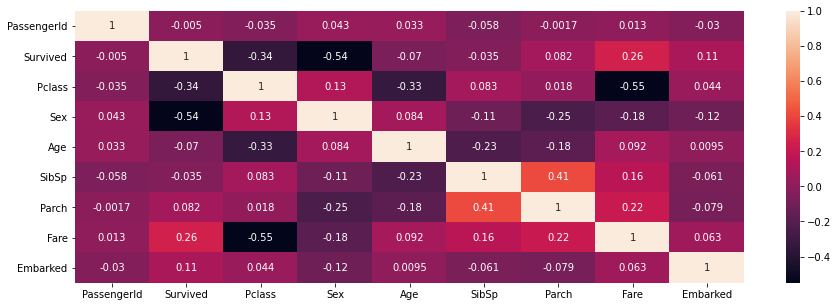

In [138]:
#Correlation 
print(df.corr())
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

#Our variables are not strongly correlated 
#We can work with them 

#Modeling

K-Nearest Neighbour (KNN)

##Baseline Model

In [152]:
#Create your dependent and independent variable 
y = df[["Survived"]]
X = df.drop(["Survived","PassengerId","Name","Ticket","Fare","Cabin"],axis=1)

#I went ahead and dropped the columns above since they really do not attribute to i knowing if the passangers survived of not 
#When doing the visualization the columns we are left with compensate for the dropped ones 

In [140]:
#Split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state =50)

In [141]:
#Feature Scale the data
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#We shall normalise the data within a particular range
#Sometimes, it also helps in speeding up the calculations in an algorithm.

In [142]:
 #Create the model
 from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [143]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [144]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7877094972067039
[[90 11]
 [27 51]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       101
           1       0.82      0.65      0.73        78

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179



80-20 split gives an accuracy of  79%

## Second Model 

In [145]:
#Create your dependent and independent variable 
y = df[["Survived"]]
X = df.drop(["Survived","PassengerId","Name","Ticket","Fare","Cabin"],axis=1)

#I went ahead and dropped the columns above since they really do not attribute to i knowing if the passangers survived of not 
#When doing the visualization the columns we are left with compensate for the dropped ones 

In [185]:
#Split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state =50)

In [147]:
#Feature Scale the data
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
#Create the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [150]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [151]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8134328358208955
[[150  12]
 [ 38  68]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       162
           1       0.85      0.64      0.73       106

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.82      0.81      0.81       268



70-30 split gives an accuracy of 81%

##Third model

In [153]:
#Create your dependent and independent variable 
y = df[["Survived"]]
X = df.drop(["Survived","PassengerId","Name","Ticket","Fare","Cabin"],axis=1)

#I went ahead and dropped the columns above since they really do not attribute to i knowing if the passangers survived of not 
#When doing the visualization the columns we are left with compensate for the dropped ones 

In [154]:
#Split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state =50)

In [155]:
#Feature Scale the data
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
#Create the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [170]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [171]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8179271708683473
[[197  21]
 [ 44  95]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       218
           1       0.82      0.68      0.75       139

    accuracy                           0.82       357
   macro avg       0.82      0.79      0.80       357
weighted avg       0.82      0.82      0.81       357



In [ ]:
60-40 split gives the model an accuracy of 82%

#Challenging the model
change the KN neighbours to find optimum number

In [175]:
#Create the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [177]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [178]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8151260504201681
[[197  21]
 [ 45  94]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       218
           1       0.82      0.68      0.74       139

    accuracy                           0.82       357
   macro avg       0.82      0.79      0.80       357
weighted avg       0.82      0.82      0.81       357



10 neighbours still gives accuracy of 82%

13 neighbours gives accuracy of 80%

11 neighbours gives an accuracy of 82%

3 neighbours reduces accuracy to 76%

Based on domain knowledge, number of neighbours should always be odd, so 9 or 13 are the suitable number of neighbours for the model

#Conclusion

The best model for predicting the survivers of the titanic shipwreck, Using KNN, has parameters of  9 neighbours and training test split by 60-40.

This gives an accuracy of 82% which is the highest 

The model is successful because it passes the success criteria of at least 80% accuracy

#Recommendation

Check for overfitting


Consider using other methods apart from KNN and compare metrics, aim to achieve accuracy of over 90%

#Follow up questions


1. Did we have the right data? YES!

2. Do we need more data? IF POSSIBLE, YES!

3. Was the model succesful? YES! 

